# Water Quality
https://www.kaggle.com/datasets/adityakadiwal/water-potability?resource=download

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Column description:
1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

# Import library dan dataset

In [1]:
# Load library yang dibutuhkan
import pandas as pd
import numpy as np
import joblib

In [2]:
# Load data untuk water_potability
df = pd.read_csv('water_potability.csv')

# Melihat ada berapa baris dan berapa kolom pada data
print(f'Dataset shape: {df.shape}')

Dataset shape: (3276, 10)


In [3]:
# Menampilkan data 
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Memisahkan fitur dan label

In [4]:
# Label
label = df['Potability']

# Fitur
fitur = df.drop(columns=['Potability'])

In [5]:
# Menampilkan label
label

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [6]:
# Menampilkan fitur
fitur

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658


# Prepocessing
Fitur pada data mentah diproses dengan urutan sebagai berikut:
1. Data kategorikal diubah jadi data numerik (*encoding*)
2. Data yang hilang dilengkapi (*imputation*)
3. Rentang nilai data diseragamkan (*feature scaling*)
4. Jumlah kolom fitur yang berlebih dikurangi (*data dimension reduction*)
5. Penanganan data imbalanced (*SMOTE*)

## Tahap 1 : Encoding

In [7]:
# Mengecek tipe data apakah perlu dilakukan encoding
print(f'Feature data types:\n{fitur.dtypes}')

Feature data types:
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
dtype: object


Kesimpulan Tahap 1: tidak perlu melakukan encoding karena data pada fitur semuanya sudah numerik.

## Tahap 2 : Imputation

In [8]:
# Mengecek jumlah data yang hilang/NA/null apakah perlu dilakukan imputasi
print(f'Missing values in features:\n{fitur.isnull().sum()}')

Missing values in features:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64


Kesimpulan Tahap 2: perlu melakukan imputation karena data fitur belum lengkap (tidak ada N/A)

In [9]:
# Melakukan mean imputation terhadap data di atas lalu tampilkan hasilnya
fitur_imputasi = fitur.fillna(fitur.mean()) 
fitur_imputasi

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [10]:
# Mengecek kembali jumlah data yang hilang/NA/null
print(f'Missing values after imputation:\n{fitur_imputasi.isnull().sum()}')

Missing values after imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64


## Tahap 3: Feature Scaling

In [11]:
# Mengecek dulu rentang nilai tiap kolom 
fitur_imputasi.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562


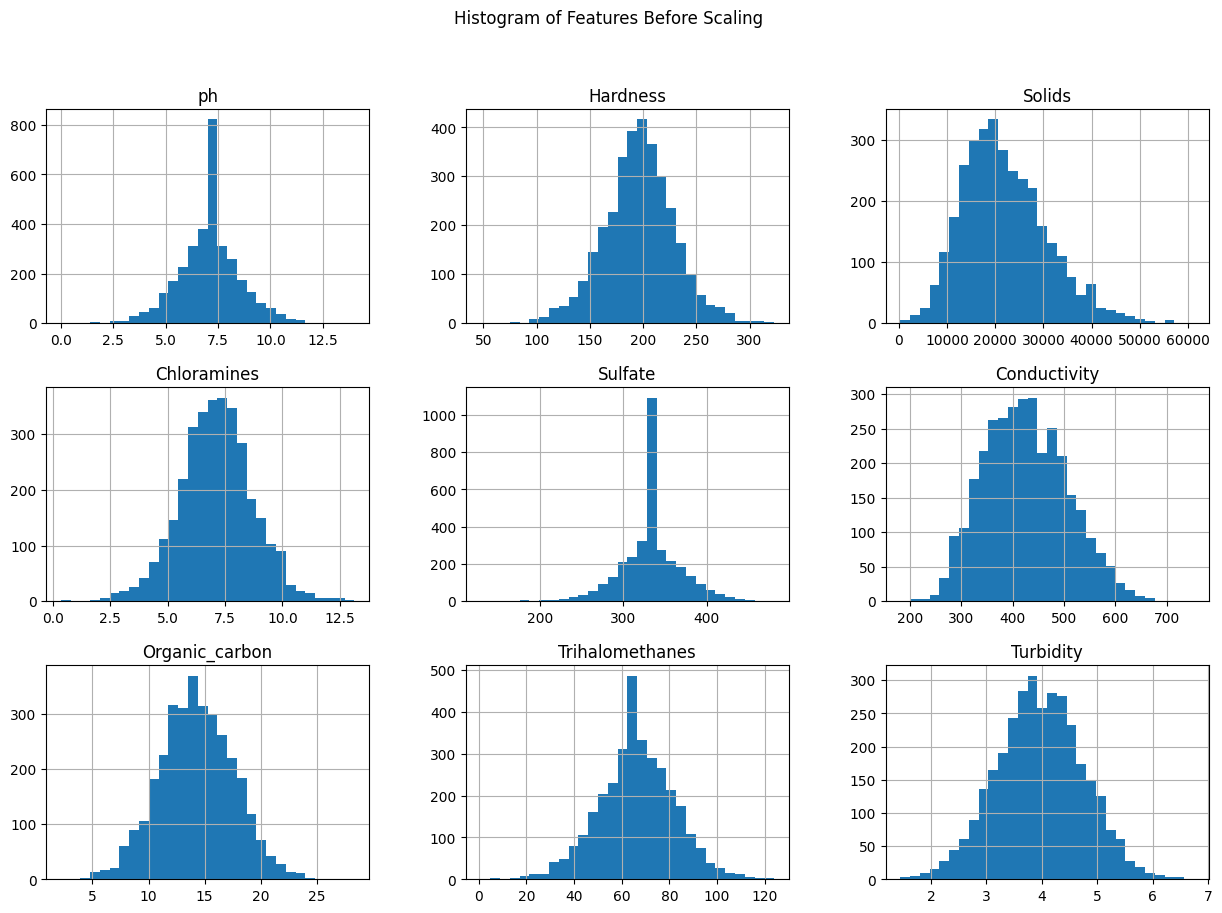

In [12]:
# Mengecek rentang nilai menggunakan histogram
import matplotlib.pyplot as plt

fitur_imputasi.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of Features Before Scaling')
plt.show()

Kesimpulan Tahap 3: PERLU melakukan feature scaling karena rentang nilai tiap kolom cukup berbeda jauh

In [13]:
# Import library yang dibutuhkan untuk Standard Scaler
from sklearn import preprocessing

# Melakukan feature scaling dengan Standard Scaler, hasilnya simpan di variabel sudah_scaling
scaler = preprocessing.StandardScaler()
scaler.fit(fitur_imputasi)
sudah_scaling=scaler.transform(fitur_imputasi)
print(sudah_scaling)

[[-6.04313345e-16  2.59194711e-01 -1.39470871e-01 ... -1.18065057e+00
   1.30614943e+00 -1.28629758e+00]
 [-2.28933938e+00 -2.03641367e+00 -3.85986650e-01 ...  2.70597240e-01
  -6.38479983e-01  6.84217891e-01]
 [ 6.92867789e-01  8.47664833e-01 -2.40047337e-01 ...  7.81116857e-01
   1.50940884e-03 -1.16736546e+00]
 ...
 [ 1.59125368e+00 -6.26829230e-01  1.27080989e+00 ... -9.81329234e-01
   2.18748247e-01 -8.56006782e-01]
 [-1.32951593e+00  1.04135450e+00 -1.14405809e+00 ... -9.42063817e-01
   7.03468419e-01  9.50797383e-01]
 [ 5.40150905e-01 -3.85462310e-02 -5.25811937e-01 ...  5.60940070e-01
   7.80223466e-01 -2.12445866e+00]]


In [14]:
# Sudah_scaling masih array sehingga perlu diubah lagi ke dataframe, simpan di fitur_scaling
fitur_scaling = pd.DataFrame(sudah_scaling, index=fitur_imputasi.index, columns=fitur_imputasi.columns)
fitur_scaling

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786
...,...,...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,7.242640e-01,1.240155,-0.118075,0.018481,0.601124
3272,4.953704e-01,-0.085667,-0.534295,0.593290,3.145987e-15,-0.417706,1.698560,0.000000,-1.497627
3273,1.591254e+00,-0.626829,1.270810,0.144017,3.145987e-15,0.072263,-0.981329,0.218748,-0.856007
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,3.145987e-15,-0.288597,-0.942064,0.703468,0.950797


# SMOTE
SMOTE digunakan karena adanya ketimpangan data pada label yang menyebabkan data tidak seimbang

In [15]:
# Menampilkan banyaknya value 0 dan 1 di kolom Potability yang merupakan label
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [16]:
# Import library yang dibutuhkan
from imblearn.over_sampling import SMOTE
import pandas as pd

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
# X_resampled = fitur, Y_resampled = label
fitur_smote, label_smote = smote.fit_resample(fitur_scaling, label)

# Menampilkan informasi setelah SMOTE
print("Jumlah sampel sebelum SMOTE:", len(fitur_scaling))
print("Jumlah sampel setelah SMOTE:", len(fitur_smote))
for class_label in set(label_smote):
    print("Jumlah sampel kelas", class_label, ":", sum(label_smote == class_label))

Jumlah sampel sebelum SMOTE: 3276
Jumlah sampel setelah SMOTE: 3996
Jumlah sampel kelas 0 : 1998
Jumlah sampel kelas 1 : 1998


# Split data training dan testing

In [17]:
from sklearn.model_selection import train_test_split

# data training = 80%, data testing = 20%
# X = data fitur, Y = data label
X_train, X_test, Y_train, Y_test = train_test_split(fitur_smote, label_smote, test_size=0.2, random_state=42)

# Melihat berapa jumlah data latih dan data ujinya
print("Banyak data latih setelah dilakukan Train-Test Split: ", len(X_train))
print("Banyak data uji setelah dilakukan Train-Test Split: ", len(X_test))

Banyak data latih setelah dilakukan Train-Test Split:  3196
Banyak data uji setelah dilakukan Train-Test Split:  800


# Optimasi: Hyperparameter Tuning dengan GridSearch dan CV

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# defining parameter range
param_grid = {
    'weights':['uniform','distance'], 
     'n_neighbors':[3,5,7,9,11,13,15], 
     'metric':['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean']
     }

#tolong perhatikan parameter scoring dan cv
classifier = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=5, verbose = 3)

# fitting the model for grid search
classifier.fit(X_train, Y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.655 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.678 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.679 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.665 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.659 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.688 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.698 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.707 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.679 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.681 to

c:\Users\WINDOWS 11\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\WINDOWS 11\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\WINDOWS 11\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\WINDOWS 11\AppData\Local\Programs\Python\Python311\Lib\site-pa

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [19]:
# print best parameter after tuning
print('parameter terbaik:',classifier.best_params_)

# print how our model looks after hyper-parameter tuning
print(classifier.best_estimator_)

parameter terbaik: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')


# Melakukan Training dan Testing K-NN

In [20]:
# Import library untuk klasifikasi dengan K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

# Menentukan cara perhitungan jarak dan nilai k nya
classifier = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
classifier.fit(X_train, Y_train)

# X_test = data fitur uji
hasil_klasifikasi = classifier.predict(X_test)

df_hasil_klasifikasi = pd.DataFrame({"prediksi":hasil_klasifikasi, "label_asli":Y_test})
df_hasil_klasifikasi

,prediksi,label_asli
1760,1,0
3016,0,0
1770,0,0
3703,1,1
2099,0,0
...,...,...
2509,0,0
2481,0,0
1869,0,0
423,1,0


# Classification Report

In [21]:
# Import library untuk menghitung classification report dan skor akurasi
from sklearn.metrics import classification_report, accuracy_score

print('Classification Report')
print(classification_report(Y_test, hasil_klasifikasi))

akurasi = np.round(accuracy_score(Y_test, hasil_klasifikasi), 4)*100
print(f'Accuracy : {akurasi}%')

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.59      0.66       394
           1       0.67      0.81      0.74       406

    accuracy                           0.70       800
   macro avg       0.71      0.70      0.70       800
weighted avg       0.71      0.70      0.70       800

Accuracy : 70.38%


# Confusion Matrix
Confusion matrix bisa digunakan untuk analisis performa klasifikasi lebih detail lagi

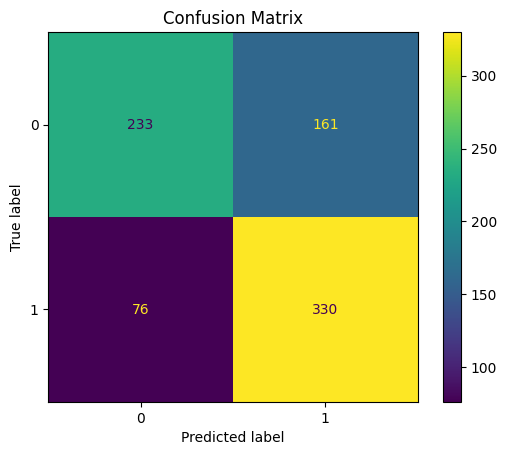

In [26]:
import matplotlib.pyplot as plt # ini untuk visualisasi grafik saja
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(Y_test, hasil_klasifikasi, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot() 
plt.title('Confusion Matrix')

# menyimpan plot sebagai PNG
plt.savefig('confusion_matrix.png')

# menampilkan plot
plt.show()

In [23]:
joblib.dump(classifier, 'model_knn.jlb')

['model_knn.jlb']